In [ ]:
#Nama : Fika Riyadi Solihin
#Nim. : 221351049
#kelas : Malam A

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fikariyadisolihin","key":"e469942ad21d26d5c3c45a418b26fba5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hgultekin/bbcnewsarchive

Dataset URL: https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive
License(s): copyright-authors
  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 818MB/s]


In [ ]:
!unzip bbcnewsarchive.zip

Archive:  bbcnewsarchive.zip
  inflating: bbc-news-data.csv       


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [ ]:
df = pd.read_csv('bbc-news-data.csv', delimiter='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
#menghapus filename
df = df.drop(columns=['filename'])
df.head()

,category,title,content,label
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,0
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,0
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,0
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,0
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,0


In [ ]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,title,content,label,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,0,True,False,False,False,False
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,0,True,False,False,False,False
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,0,True,False,False,False,False
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,0,True,False,False,False,False
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,4,False,False,False,False,True
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,4,False,False,False,False,True
2222,Be careful how you code,A new European directive could put software w...,4,False,False,False,False,True
2223,US cyber security chief resigns,The man making sure US computer networks are ...,4,False,False,False,False,True


In [ ]:
content = df_baru['content'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
content_latih, content_test, label_latih, label_test = train_test_split(content, label, test_size=0.2)

In [ ]:
#Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(content_latih)
tokenizer.fit_on_texts(content_test)

sekuens_latih = tokenizer.texts_to_sequences(content_latih)
sekuens_test = tokenizer.texts_to_sequences(content_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:

#modeling
input_length = padded_latih.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.build(input_shape=(None, input_length))

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

#membuatmodel
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 4436, 16)       │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,637 (459.52 KB)

 Trainable params: 117,637 (459.52 KB)

 Non-trainable params: 0 (0.00 B)

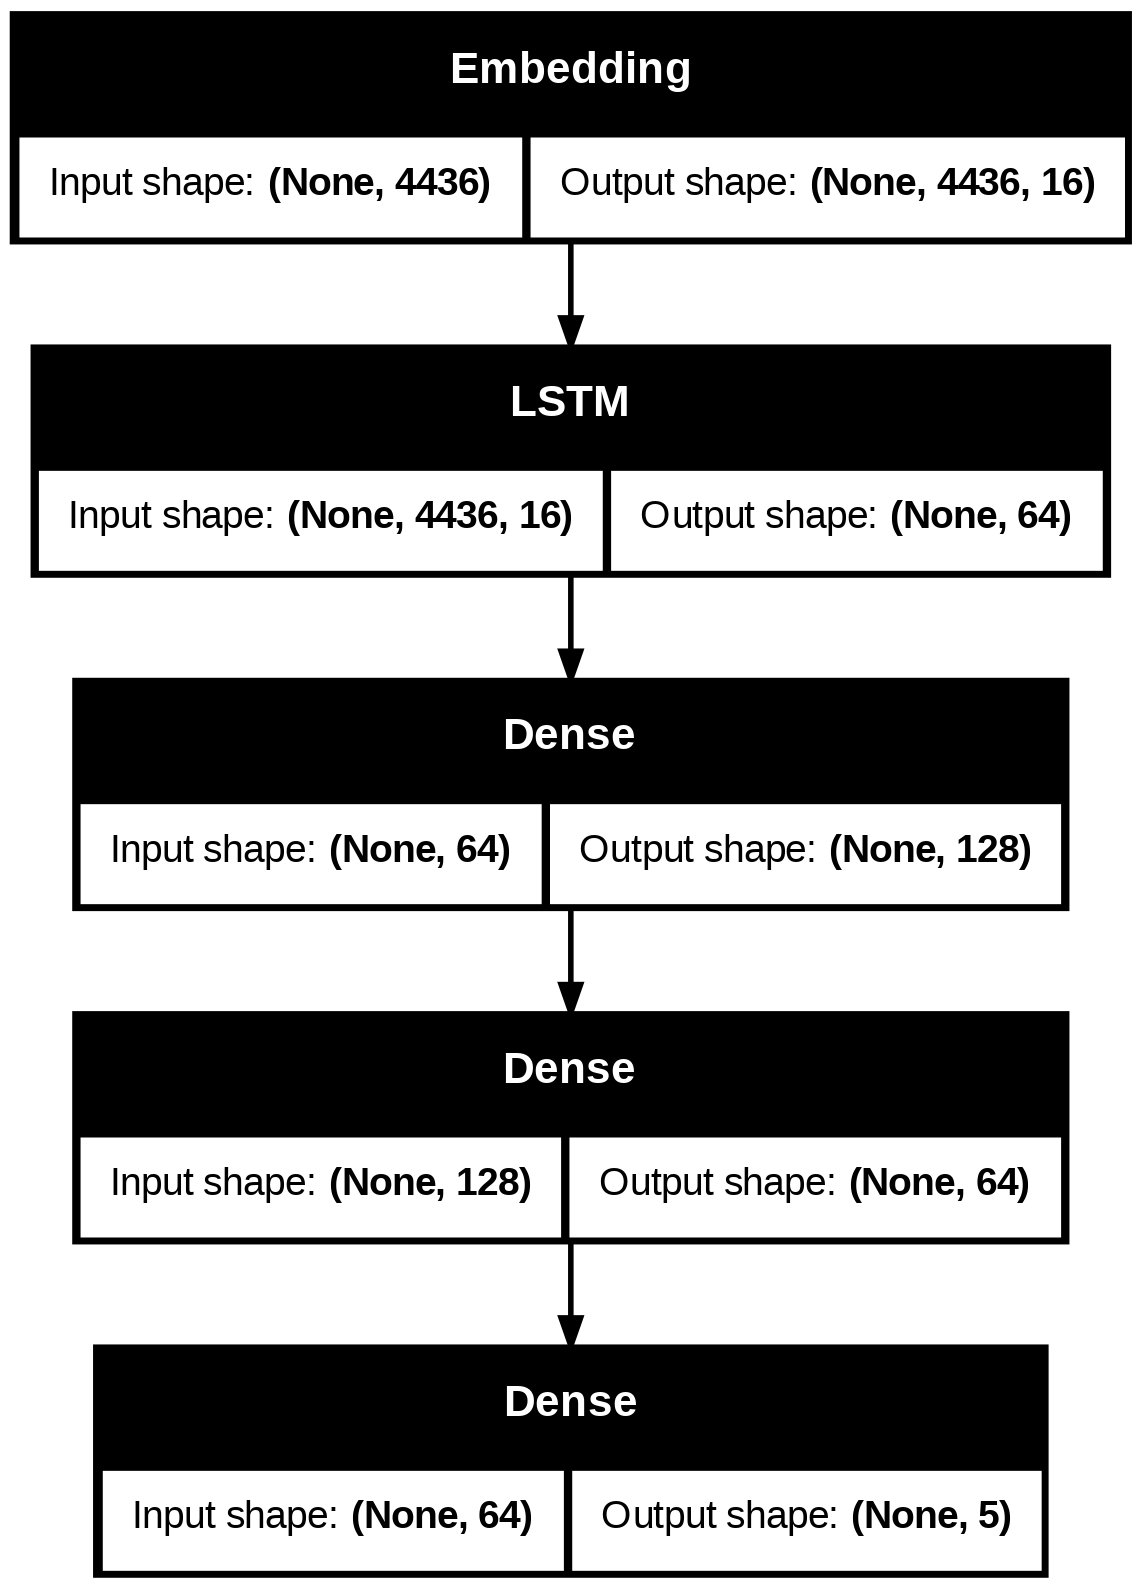

In [ ]:

#membuat model plot
plot_model(model, show_shapes=True)

In [ ]:

history = model.fit(padded_latih, label_latih, epochs=15,
                    validation_data=(padded_test, label_test))

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.2239 - loss: 1.6087 - val_accuracy: 0.2449 - val_loss: 1.5212
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.3144 - loss: 1.4922 - val_accuracy: 0.5281 - val_loss: 1.0675
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.5637 - loss: 0.9776 - val_accuracy: 0.4944 - val_loss: 1.0387
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.5798 - loss: 0.8092 - val_accuracy: 0.5326 - val_loss: 0.9949
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.6113 - loss: 0.6906 - val_accuracy: 0.5888 - val_loss: 1.0690
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.6842 - loss: 0.5623 - val_accuracy: 0.5551 - val_loss: 1.0126
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.7266 - loss: 0.4619 - val_accuracy: 0.6629 - val_loss: 0.9079
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.7948 - loss: 0.3708 - val_accurac

In [ ]:

hasil = ["England Clinches Victory in Thrilling Final Match "]
hasil = tokenizer.texts_to_sequences (hasil)
hasil = pad_sequences (hasil)
#print(model.predict(hasil))
hasil = np.argmax(model.predict(hasil), axis=1)
if hasil == [0]:
  print('business')
if hasil == [1]:
  print('entertainment')
if hasil == [2]:
  print('politics')
if hasil == [3]:
  print('sport')
if hasil == [4]:
  print('tech')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
sport
